In [97]:
import pandas as pd 
import numpy as np

import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics

In [98]:
df = pd.read_csv('input.csv',delim_whitespace=True)
df.head()



,ID,Type,CISD1,G6PD,AKR1C3,HSBP1,ALOX5,ACO1,PHKG2,PGD,GSS,STEAP3,GCLM,PEBP1,CBS,AIFM2,ALOX12,ABCC1,KEAP1,CS
0,GSM1539119_con,Normal,8.795816,8.273098,8.238499,8.706207,8.540995,7.301146,7.237659,10.501995,7.314575,6.760666,7.269242,8.385940,6.888328,6.727363,7.306877,6.765464,7.483634,8.562655
1,GSM1539120_con,Normal,8.699967,8.194936,7.897531,9.035012,8.604370,7.478337,7.215443,10.235847,7.127705,6.725173,7.232673,8.533798,7.184849,6.702617,7.316006,6.777152,7.300943,8.610914
2,GSM1539121_con,Normal,8.325783,8.236834,8.105612,8.747281,8.577156,7.545336,7.259039,9.971817,7.505986,6.688136,7.348975,7.968376,7.113454,6.814376,6.993295,6.760981,7.493011,8.584417
3,GSM1539122_con,Normal,8.626391,8.220537,8.185611,8.784318,8.667452,7.610433,7.099580,10.328776,7.253972,6.675609,7.247410,7.980878,6.975176,6.751035,7.669748,6.756492,7.326599,8.542854
4,GSM1539123_con,Normal,8.650741,8.012726,7.832104,9.005201,8.614420,7.437102,6.994591,10.129801,7.270759,6.707308,7.216582,7.850519,6.869509,6.643639,7.341164,6.767811,7.406798,8.743702


In [99]:
df =  df[df.columns].replace({'Tumor':1, 'Normal':0, })


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716 entries, 0 to 715
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      716 non-null    object 
 1   Type    716 non-null    int64  
 2   CISD1   716 non-null    float64
 3   G6PD    716 non-null    float64
 4   AKR1C3  716 non-null    float64
 5   HSBP1   716 non-null    float64
 6   ALOX5   716 non-null    float64
 7   ACO1    716 non-null    float64
 8   PHKG2   716 non-null    float64
 9   PGD     716 non-null    float64
 10  GSS     716 non-null    float64
 11  STEAP3  716 non-null    float64
 12  GCLM    716 non-null    float64
 13  PEBP1   716 non-null    float64
 14  CBS     716 non-null    float64
 15  AIFM2   716 non-null    float64
 16  ALOX12  716 non-null    float64
 17  ABCC1   716 non-null    float64
 18  KEAP1   716 non-null    float64
 19  CS      716 non-null    float64
dtypes: float64(18), int64(1), object(1)
memory usage: 112.0+ KB


In [129]:
df.describe().T.style.set_properties(**{'background-color': 'grey','color': 'white','border-color': 'white'})

,count,mean,std,min,25%,50%,75%,max
Type,716.000000,0.666201,0.471899,0.000000,0.000000,1.000000,1.000000,1.000000
CISD1,716.000000,8.114654,0.275213,7.392273,7.924333,8.090569,8.289950,8.939007
G6PD,716.000000,8.490226,0.227524,7.767754,8.349721,8.508750,8.646075,9.143072
AKR1C3,716.000000,7.508841,0.405679,6.603715,7.242175,7.455101,7.736827,9.513549
HSBP1,716.000000,8.684740,0.230119,8.110842,8.517403,8.672173,8.849712,9.402732
ALOX5,716.000000,8.810316,0.155868,8.237872,8.705867,8.812743,8.912031,9.270360
ACO1,716.000000,7.606496,0.144403,7.153308,7.507512,7.611638,7.702890,7.989296
PHKG2,716.000000,7.291767,0.145299,6.731529,7.201222,7.290568,7.384711,7.777791
PGD,716.000000,10.699477,0.361561,9.343742,10.474226,10.727750,10.937387,11.666733
GSS,716.000000,7.381162,0.135075,6.976528,7.286659,7.390116,7.473684,7.742642


In [101]:
import statsmodels.api as sm
train_label = df.columns[1:2]

train_cols = df.columns[2:]

X_test = train_label
y_test = train_cols

logit = sm.Logit(df[train_label], df[train_cols])

result = logit.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.550709
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   Type   No. Observations:                  716
Model:                          Logit   Df Residuals:                      698
Method:                           MLE   Df Model:                           17
Date:                Fri, 08 Jul 2022   Pseudo R-squ.:                  0.1352
Time:                        22:10:22   Log-Likelihood:                -394.31
converged:                       True   LL-Null:                       -455.97
Covariance Type:            nonrobust   LLR p-value:                 3.563e-18
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
CISD1         -1.6853      0.464     -3.632      0.000      -2.595      -0.776
G6PD           1.0406      0.

In [102]:
from sklearn.preprocessing import OneHotEncoder 
enc = OneHotEncoder() 

# Encoding categorical features 
# categ = df[['AgeCategory', 'Race', 'GenHealth']]
# encoded_categ = pd.DataFrame(enc.fit_transform(categ).toarray())

#Likning the encoed_cateh with the df
# df = pd.concat([df, encoded_categ], axis = 1)

# Dropping the categorical features
df0 = df.drop(columns = ['ID','G6PD','AKR1C3','HSBP1','ALOX5','ACO1','PHKG2','PGD','GSS','STEAP3','GCLM','PEBP1','CBS','AIFM2','ALOX12','ABCC1','KEAP1','CS'], axis = 1)
df1 = df.drop(columns = ['ID','CISD1','G6PD','AKR1C3','ALOX5','ACO1','PHKG2','PGD','GSS','STEAP3','GCLM','PEBP1','CBS','AIFM2','ALOX12','ABCC1','KEAP1','CS'], axis = 1)
df2 = df.drop(columns = ['ID','CISD1','G6PD','AKR1C3','HSBP1','ALOX5','ACO1','PHKG2','GSS','STEAP3','GCLM','PEBP1','CBS','AIFM2','ALOX12','ABCC1','KEAP1','CS'], axis = 1)
df3 = df.drop(columns = ['ID','CISD1','G6PD','AKR1C3','HSBP1','ALOX5','ACO1','PHKG2','PGD','STEAP3','GCLM','PEBP1','CBS','AIFM2','ALOX12','ABCC1','KEAP1','CS'], axis = 1)
df4 = df.drop(columns = ['ID','CISD1','G6PD','AKR1C3','HSBP1','ALOX5','ACO1','PHKG2','PGD','GSS','STEAP3','PEBP1','CBS','AIFM2','ALOX12','ABCC1','KEAP1','CS'], axis = 1)
df5 = df.drop(columns = ['ID','CISD1','G6PD','AKR1C3','HSBP1','ALOX5','ACO1','PHKG2','PGD','GSS','STEAP3','GCLM','CBS','AIFM2','ALOX12','ABCC1','KEAP1','CS'], axis = 1)
df6 = df.drop(columns = ['ID','CISD1','G6PD','AKR1C3','HSBP1','ALOX5','ACO1','PHKG2','PGD','GSS','STEAP3','GCLM','PEBP1','CBS','AIFM2','ALOX12','ABCC1','KEAP1',], axis = 1)
df7 = df.drop(columns = ['ID','G6PD','AKR1C3','ALOX5','ACO1','PHKG2','STEAP3','CBS','AIFM2','ALOX12','ABCC1','KEAP1'], axis = 1)


# CISD1         -1.6853      0.464     -3.632      0.000      -2.595      -0.776
# HSBP1         -1.6595      0.509     -3.262      0.001      -2.657      -0.662
# PGD           -1.1922      0.477     -2.497      0.013      -2.128      -0.257
# GSS            2.5334      0.857      2.956      0.003       0.853       4.213
# GCLM           3.1088      0.948      3.279      0.001       1.251       4.967
# PEBP1         -1.2300      0.391     -3.142      0.002      -1.997      -0.463
# CS            -2.8360      0.876     -3.237      0.001      -4.553      -1.119

# df0 = df.drop(columns = ['ID','CISD1','G6PD','AKR1C3','HSBP1','ALOX5','ACO1','PHKG2','PGD','GSS','STEAP3','GCLM','PEBP1','CBS','AIFM2','ALOX12','ABCC1','KEAP1','CS'], axis = 1)
# 1   Type    716 non-null    int64  
#  2   CISD1   716 non-null    float64
#  3   G6PD    716 non-null    float64
#  4   AKR1C3  716 non-null    float64
#  5   HSBP1   716 non-null    float64
#  6   ALOX5   716 non-null    float64
#  7   ACO1    716 non-null    float64
#  8   PHKG2   716 non-null    float64
#  9   PGD     716 non-null    float64
#  10  GSS     716 non-null    float64
#  11  STEAP3  716 non-null    float64
#  12  GCLM    716 non-null    float64
#  13  PEBP1   716 non-null    float64
#  14  CBS     716 non-null    float64
#  15  AIFM2   716 non-null    float64
#  16  ALOX12  716 non-null    float64
#  17  ABCC1   716 non-null    float64
#  18  KEAP1   716 non-null    float64
#  19  CS      716 non-null    float64




In [103]:
#Select Features
features = df0.drop(columns =['Type'], axis = 1)

#Select Target 
target = df0['Type']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train0, X_test0, y_train0, y_test0 = train_test_split(features, target, shuffle = True, test_size = .2, random_state = 44)


print('Shape of training feature:', X_train0.shape)
print('Shape of testing feature:', X_test0.shape)
print('Shape of training label:', y_train0.shape)
print('Shape of training label:', y_test0.shape)

Shape of training feature: (572, 1)
Shape of testing feature: (144, 1)
Shape of training label: (572,)
Shape of training label: (144,)


In [104]:
#Select Features
features = df1.drop(columns =['Type'], axis = 1)

#Select Target 
target = df1['Type']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(features, target, shuffle = True, test_size = .2, random_state = 44)


print('Shape of training feature:', X_train1.shape)
print('Shape of testing feature:', X_test1.shape)
print('Shape of training label:', y_train1.shape)
print('Shape of training label:', y_test1.shape)

Shape of training feature: (572, 1)
Shape of testing feature: (144, 1)
Shape of training label: (572,)
Shape of training label: (144,)


In [105]:
#Select Features
features = df2.drop(columns =['Type'], axis = 1)

#Select Target 
target = df2['Type']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(features, target, shuffle = True, test_size = .2, random_state = 44)


print('Shape of training feature:', X_train2.shape)
print('Shape of testing feature:', X_test2.shape)
print('Shape of training label:', y_train2.shape)
print('Shape of training label:', y_test2.shape)

Shape of training feature: (572, 1)
Shape of testing feature: (144, 1)
Shape of training label: (572,)
Shape of training label: (144,)


In [106]:
#Select Features
features = df3.drop(columns =['Type'], axis = 1)

#Select Target 
target = df3['Type']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(features, target, shuffle = True, test_size = .2, random_state = 44)


print('Shape of training feature:', X_train3.shape)
print('Shape of testing feature:', X_test3.shape)
print('Shape of training label:', y_train3.shape)
print('Shape of training label:', y_test3.shape)

Shape of training feature: (572, 1)
Shape of testing feature: (144, 1)
Shape of training label: (572,)
Shape of training label: (144,)


In [107]:
#Select Features
features = df4.drop(columns =['Type'], axis = 1)

#Select Target 
target = df4['Type']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train4, X_test4, y_train4, y_test4 = train_test_split(features, target, shuffle = True, test_size = .2, random_state = 44)


print('Shape of training feature:', X_train4.shape)
print('Shape of testing feature:', X_test4.shape)
print('Shape of training label:', y_train4.shape)
print('Shape of training label:', y_test4.shape)

Shape of training feature: (572, 1)
Shape of testing feature: (144, 1)
Shape of training label: (572,)
Shape of training label: (144,)


In [108]:
#Select Features
features = df5.drop(columns =['Type'], axis = 1)

#Select Target 
target = df5['Type']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train5, X_test5, y_train5, y_test5 = train_test_split(features, target, shuffle = True, test_size = .2, random_state = 44)


print('Shape of training feature:', X_train5.shape)
print('Shape of testing feature:', X_test5.shape)
print('Shape of training label:', y_train5.shape)
print('Shape of training label:', y_test5.shape)

Shape of training feature: (572, 1)
Shape of testing feature: (144, 1)
Shape of training label: (572,)
Shape of training label: (144,)


In [109]:
#Select Features
features = df6.drop(columns =['Type'], axis = 1)

#Select Target
target = df6['Type']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train6, X_test6, y_train6, y_test6 = train_test_split(features, target, shuffle = True, test_size = .2, random_state = 44)


print('Shape of training feature:', X_train6.shape)
print('Shape of testing feature:', X_test6.shape)
print('Shape of training label:', y_train6.shape)
print('Shape of training label:', y_test6.shape)

Shape of training feature: (572, 1)
Shape of testing feature: (144, 1)
Shape of training label: (572,)
Shape of training label: (144,)


In [110]:
#Select Features
features = df7.drop(columns =['Type'], axis = 1)

#Select Target
target = df7['Type']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train7, X_test7, y_train7, y_test7 = train_test_split(features, target, shuffle = True, test_size = .2, random_state = 44)


print('Shape of training feature:', X_train7.shape)
print('Shape of testing feature:', X_test7.shape)
print('Shape of training label:', y_train7.shape)
print('Shape of training label:', y_test7.shape)

Shape of training feature: (572, 7)
Shape of testing feature: (144, 7)
Shape of training label: (572,)
Shape of training label: (144,)


建模

In [111]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred0 = model.predict(X_test0)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test0, y_pred0)
    prec = metrics.precision_score(y_test0, y_pred0)
    rec = metrics.recall_score(y_test0, y_pred0)
    f1 = metrics.f1_score(y_test0, y_pred0)
    kappa = metrics.cohen_kappa_score(y_test0, y_pred0)

    # Calculate area under curve (AUC)
    y_pred_proba0 = model.predict_proba(X_test0)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test0, y_pred_proba0)
    auc = metrics.roc_auc_score(y_test0, y_pred_proba0)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test0, y_pred0)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [112]:
LR0 = LogisticRegression()
LR0.fit(X_train0, y_train0)

LR_eval0 = evaluate_model(LR0, X_test0, y_test0)

print('Accuracy:', LR_eval0['acc'])
print('Precision:', LR_eval0['prec'])
print('Recall:', LR_eval0['rec'])
print('F1 Score:', LR_eval0['f1'])
print('Cohens Kappa Score:', LR_eval0['kappa'])
print('Area Under Curve:', LR_eval0['auc'])
print('Confusion Matrix:\n', LR_eval0['cm'])


Accuracy: 0.6458333333333334
Precision: 0.6538461538461539
Recall: 0.9340659340659341
F1 Score: 0.7692307692307693
Cohens Kappa Score: 0.10044096031357175
Area Under Curve: 0.6722993987144931
Confusion Matrix:
 [[ 8 45]
 [ 6 85]]


In [113]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred1 = model.predict(X_test1)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test1, y_pred1)
    prec = metrics.precision_score(y_test1, y_pred1)
    rec = metrics.recall_score(y_test1, y_pred1)
    f1 = metrics.f1_score(y_test1, y_pred1)
    kappa = metrics.cohen_kappa_score(y_test1, y_pred1)

    # Calculate area under curve (AUC)
    y_pred_proba1 = model.predict_proba(X_test1)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test1, y_pred_proba1)
    auc = metrics.roc_auc_score(y_test1, y_pred_proba1)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test1, y_pred1)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [114]:
LR1 = LogisticRegression()
LR1.fit(X_train1, y_train1)

LR_eval1 = evaluate_model(LR1, X_test1, y_test1)

print('Accuracy:', LR_eval1['acc'])
print('Precision:', LR_eval1['prec'])
print('Recall:', LR_eval1['rec'])
print('F1 Score:', LR_eval1['f1'])
print('Cohens Kappa Score:', LR_eval1['kappa'])
print('Area Under Curve:', LR_eval1['auc'])
print('Confusion Matrix:\n', LR_eval1['cm'])


Accuracy: 0.6319444444444444
Precision: 0.6357142857142857
Recall: 0.978021978021978
F1 Score: 0.7705627705627704
Cohens Kappa Score: 0.019527235354573458
Area Under Curve: 0.5843873108024051
Confusion Matrix:
 [[ 2 51]
 [ 2 89]]


In [115]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred2 = model.predict(X_test2)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test2, y_pred2)
    prec = metrics.precision_score(y_test2, y_pred2)
    rec = metrics.recall_score(y_test2, y_pred2)
    f1 = metrics.f1_score(y_test2, y_pred2)
    kappa = metrics.cohen_kappa_score(y_test2, y_pred2)

    # Calculate area under curve (AUC)
    y_pred_proba2 = model.predict_proba(X_test2)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test2, y_pred_proba2)
    auc = metrics.roc_auc_score(y_test2, y_pred_proba2)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test2, y_pred2)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [116]:
LR2 = LogisticRegression()
LR2.fit(X_train2, y_train2)

LR_eval2 = evaluate_model(LR2, X_test2, y_test2)

print('Accuracy:', LR_eval2['acc'])
print('Precision:', LR_eval2['prec'])
print('Recall:', LR_eval2['rec'])
print('F1 Score:', LR_eval2['f1'])
print('Cohens Kappa Score:', LR_eval2['kappa'])
print('Area Under Curve:', LR_eval2['auc'])
print('Confusion Matrix:\n', LR_eval2['cm'])


Accuracy: 0.6319444444444444
Precision: 0.6338028169014085
Recall: 0.989010989010989
F1 Score: 0.7725321888412018
Cohens Kappa Score: 0.009859885832900761
Area Under Curve: 0.6485589881816296
Confusion Matrix:
 [[ 1 52]
 [ 1 90]]


In [117]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred3 = model.predict(X_test3)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test3, y_pred3)
    prec = metrics.precision_score(y_test3, y_pred3)
    rec = metrics.recall_score(y_test3, y_pred3)
    f1 = metrics.f1_score(y_test3, y_pred3)
    kappa = metrics.cohen_kappa_score(y_test3, y_pred3)

    # Calculate area under curve (AUC)
    y_pred_proba3 = model.predict_proba(X_test3)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test3, y_pred_proba3)
    auc = metrics.roc_auc_score(y_test3, y_pred_proba3)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test3, y_pred3)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [118]:
LR3 = LogisticRegression()
LR3.fit(X_train3, y_train3)

LR_eval3 = evaluate_model(LR3, X_test3, y_test3)

print('Accuracy:', LR_eval3['acc'])
print('Precision:', LR_eval3['prec'])
print('Recall:', LR_eval3['rec'])
print('F1 Score:', LR_eval3['f1'])
print('Cohens Kappa Score:', LR_eval3['kappa'])
print('Area Under Curve:', LR_eval3['auc'])
print('Confusion Matrix:\n', LR_eval3['cm'])


Accuracy: 0.6319444444444444
Precision: 0.6319444444444444
Recall: 1.0
F1 Score: 0.774468085106383
Cohens Kappa Score: 0.0
Area Under Curve: 0.6314534522081692
Confusion Matrix:
 [[ 0 53]
 [ 0 91]]


In [119]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred4 = model.predict(X_test4)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test4, y_pred4)
    prec = metrics.precision_score(y_test4, y_pred4)
    rec = metrics.recall_score(y_test4, y_pred4)
    f1 = metrics.f1_score(y_test4, y_pred4)
    kappa = metrics.cohen_kappa_score(y_test4, y_pred4)

    # Calculate area under curve (AUC)
    y_pred_proba4 = model.predict_proba(X_test4)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test4, y_pred_proba4)
    auc = metrics.roc_auc_score(y_test4, y_pred_proba4)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test4, y_pred4)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [120]:
LR4 = LogisticRegression()
LR4.fit(X_train4, y_train4)

LR_eval4 = evaluate_model(LR4, X_test4, y_test4)

print('Accuracy:', LR_eval4['acc'])
print('Precision:', LR_eval4['prec'])
print('Recall:', LR_eval4['rec'])
print('F1 Score:', LR_eval4['f1'])
print('Cohens Kappa Score:', LR_eval4['kappa'])
print('Area Under Curve:', LR_eval4['auc'])
print('Confusion Matrix:\n', LR_eval4['cm'])


Accuracy: 0.6319444444444444
Precision: 0.6319444444444444
Recall: 1.0
F1 Score: 0.774468085106383
Cohens Kappa Score: 0.0
Area Under Curve: 0.5891561268919759
Confusion Matrix:
 [[ 0 53]
 [ 0 91]]


In [121]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred5 = model.predict(X_test5)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test5, y_pred5)
    prec = metrics.precision_score(y_test5, y_pred5)
    rec = metrics.recall_score(y_test5, y_pred5)
    f1 = metrics.f1_score(y_test5, y_pred5)
    kappa = metrics.cohen_kappa_score(y_test5, y_pred5)

    # Calculate area under curve (AUC)
    y_pred_proba5 = model.predict_proba(X_test5)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test5, y_pred_proba5)
    auc = metrics.roc_auc_score(y_test5, y_pred_proba5)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test5, y_pred5)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [122]:
LR5 = LogisticRegression()
LR5.fit(X_train5, y_train5)

LR_eval5 = evaluate_model(LR5, X_test5, y_test5)

print('Accuracy:', LR_eval5['acc'])
print('Precision:', LR_eval5['prec'])
print('Recall:', LR_eval5['rec'])
print('F1 Score:', LR_eval5['f1'])
print('Cohens Kappa Score:', LR_eval5['kappa'])
print('Area Under Curve:', LR_eval5['auc'])
print('Confusion Matrix:\n', LR_eval5['cm'])


Accuracy: 0.6319444444444444
Precision: 0.6319444444444444
Recall: 1.0
F1 Score: 0.774468085106383
Cohens Kappa Score: 0.0
Area Under Curve: 0.5822102425876011
Confusion Matrix:
 [[ 0 53]
 [ 0 91]]


In [123]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred6 = model.predict(X_test6)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test6, y_pred6)
    prec = metrics.precision_score(y_test6, y_pred6)
    rec = metrics.recall_score(y_test6, y_pred6)
    f1 = metrics.f1_score(y_test6, y_pred6)
    kappa = metrics.cohen_kappa_score(y_test6, y_pred6)

    # Calculate area under curve (AUC)
    y_pred_proba6 = model.predict_proba(X_test6)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test6, y_pred_proba6)
    auc = metrics.roc_auc_score(y_test6, y_pred_proba6)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test6, y_pred6)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [124]:
LR6 = LogisticRegression()
LR6.fit(X_train6, y_train6)

LR_eval6 = evaluate_model(LR6, X_test6, y_test6)

print('Accuracy:', LR_eval6['acc'])
print('Precision:', LR_eval6['prec'])
print('Recall:', LR_eval6['rec'])
print('F1 Score:', LR_eval6['f1'])
print('Cohens Kappa Score:', LR_eval6['kappa'])
print('Area Under Curve:', LR_eval6['auc'])
print('Confusion Matrix:\n', LR_eval6['cm'])


Accuracy: 0.6319444444444444
Precision: 0.6319444444444444
Recall: 1.0
F1 Score: 0.774468085106383
Cohens Kappa Score: 0.0
Area Under Curve: 0.5798258345428158
Confusion Matrix:
 [[ 0 53]
 [ 0 91]]


In [125]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred7 = model.predict(X_test7)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test7, y_pred7)
    prec = metrics.precision_score(y_test7, y_pred7)
    rec = metrics.recall_score(y_test7, y_pred7)
    f1 = metrics.f1_score(y_test7, y_pred7)
    kappa = metrics.cohen_kappa_score(y_test7, y_pred7)

    # Calculate area under curve (AUC)
    y_pred_proba7 = model.predict_proba(X_test7)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test7, y_pred_proba7)
    auc = metrics.roc_auc_score(y_test7, y_pred_proba7)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test7, y_pred7)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [126]:
LR7 = LogisticRegression()
LR7.fit(X_train7, y_train7)

LR_eval7 = evaluate_model(LR7, X_test7, y_test7)

print('Accuracy:', LR_eval7['acc'])
print('Precision:', LR_eval7['prec'])
print('Recall:', LR_eval7['rec'])
print('F1 Score:', LR_eval7['f1'])
print('Cohens Kappa Score:', LR_eval7['kappa'])
print('Area Under Curve:', LR_eval7['auc'])
print('Confusion Matrix:\n', LR_eval7['cm'])


Accuracy: 0.6736111111111112
Precision: 0.6746031746031746
Recall: 0.9340659340659341
F1 Score: 0.7834101382488479
Cohens Kappa Score: 0.18614718614718617
Area Under Curve: 0.7169811320754718
Confusion Matrix:
 [[12 41]
 [ 6 85]]


d:\Things\Code\Anaconda3\envs\For_CNN\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


画图


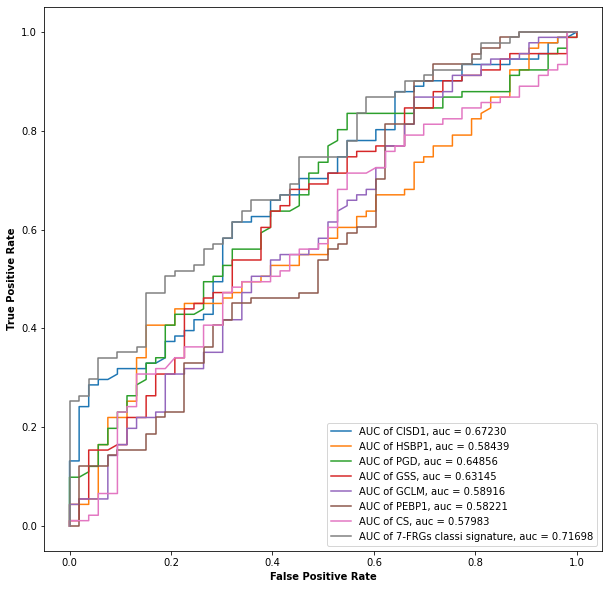

In [127]:
fig, ax = plt.subplots(figsize = (10,10))

fig.set_figheight(10)
fig.set_figwidth(10)
fig.set_facecolor('white')


# CISD1         -1.6853      0.464     -3.632      0.000      -2.595      -0.776
# HSBP1         -1.6595      0.509     -3.262      0.001      -2.657      -0.662
# PGD           -1.1922      0.477     -2.497      0.013      -2.128      -0.257
# GSS            2.5334      0.857      2.956      0.003       0.853       4.213
# GCLM           3.1088      0.948      3.279      0.001       1.251       4.967
# PEBP1         -1.2300      0.391     -3.142      0.002      -1.997      -0.463
# CS            -2.8360      0.876     -3.237      0.001      -4.553      -1.119

# df0 = df.drop(columns = ['ID','CISD1','G6PD','AKR1C3','HSBP1','ALOX5','ACO1','PHKG2','PGD','GSS','STEAP3','GCLM','PEBP1','CBS','AIFM2','ALOX12','ABCC1','KEAP1','CS'], axis = 1)
# 1   Type    716 non-null    int64  
#  2   CISD1   716 non-null    float64
#  3   G6PD    716 non-null    float64
#  4   AKR1C3  716 non-null    float64
#  5   HSBP1   716 non-null    float64
#  6   ALOX5   716 non-null    float64
#  7   ACO1    716 non-null    float64
#  8   PHKG2   716 non-null    float64
#  9   PGD     716 non-null    float64
#  10  GSS     716 non-null    float64
#  11  STEAP3  716 non-null    float64
#  12  GCLM    716 non-null    float64
#  13  PEBP1   716 non-null    float64
#  14  CBS     716 non-null    float64
#  15  AIFM2   716 non-null    float64
#  16  ALOX12  716 non-null    float64
#  17  ABCC1   716 non-null    float64
#  18  KEAP1   716 non-null    float64
#  19  CS      716 non-null    float64

ax.plot(LR_eval0['fpr'], LR_eval0['tpr'], label='AUC of CISD1, auc = {:0.5f}'.format(LR_eval0['auc']))
ax.plot(LR_eval1['fpr'], LR_eval1['tpr'], label='AUC of HSBP1, auc = {:0.5f}'.format(LR_eval1['auc']))
ax.plot(LR_eval2['fpr'], LR_eval2['tpr'], label='AUC of PGD, auc = {:0.5f}'.format(LR_eval2['auc']))
ax.plot(LR_eval3['fpr'], LR_eval3['tpr'], label='AUC of GSS, auc = {:0.5f}'.format(LR_eval3['auc']))
ax.plot(LR_eval4['fpr'], LR_eval4['tpr'], label='AUC of GCLM, auc = {:0.5f}'.format(LR_eval4['auc']))
ax.plot(LR_eval5['fpr'], LR_eval5['tpr'], label='AUC of PEBP1, auc = {:0.5f}'.format(LR_eval5['auc']))
ax.plot(LR_eval6['fpr'], LR_eval6['tpr'], label='AUC of CS, auc = {:0.5f}'.format(LR_eval6['auc']))
ax.plot(LR_eval7['fpr'], LR_eval7['tpr'], label='AUC of 7-FRGs classi signature, auc = {:0.5f}'.format(LR_eval7['auc']))
# ax.plot(LR_eval8['fpr'], LR_eval8['tpr'], label='AUC of BTG2, auc = {:0.5f}'.format(LR_eval8['auc']))
# ax.plot(LR_eval9['fpr'], LR_eval9['tpr'], label='AUC of CWH43, auc = {:0.5f}'.format(LR_eval9['auc']))
# ax.plot(LR_eval10['fpr'], LR_eval10['tpr'], label='AUC of SLC16A9, auc = {:0.5f}'.format(LR_eval10['auc']))
# ax.plot(LR_eval11['fpr'], LR_eval11['tpr'], label='AUC of CLDN10, auc = {:0.5f}'.format(LR_eval11['auc']))
# ax.plot(LR_eval12['fpr'], LR_eval12['tpr'], label='AUC of SLC19A2, auc = {:0.5f}'.format(LR_eval12['auc']))
# ax.plot(LR_eval13['fpr'], LR_eval13['tpr'], label='AUC of COL4A2, auc = {:0.5f}'.format(LR_eval13['auc']))
# ax.plot(LR_eval14['fpr'], LR_eval14['tpr'], label='AUC of RP11-38P22.2, auc = {:0.5f}'.format(LR_eval14['auc']))
# ax.plot(LR_eval15['fpr'], LR_eval15['tpr'], label='AUC of YOD1, auc = {:0.5f}'.format(LR_eval15['auc']))
# ax.plot(LR_eval16['fpr'], LR_eval16['tpr'], label='AUC of CYR61, auc = {:0.5f}'.format(LR_eval16['auc']))
# ax.plot(LR_eval17['fpr'], LR_eval17['tpr'], label='AUC of FOS, auc = {:0.5f}'.format(LR_eval17['auc']))
# ax.plot(LR_eval18['fpr'], LR_eval18['tpr'], label='AUC of TYRP1, auc = {:0.5f}'.format(LR_eval18['auc']))
# ax.plot(LR_eval19['fpr'], LR_eval19['tpr'], label='AUC of all, auc = {:0.5f}'.format(LR_eval19['auc']))

# ax.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))

## Configure x and y axis
ax.set_xlabel('False Positive Rate', fontweight='bold')
ax.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax.legend(loc=4)

plt.show()
fig.savefig('7 all AUC.png',dpi=600,bbox_inches='tight')


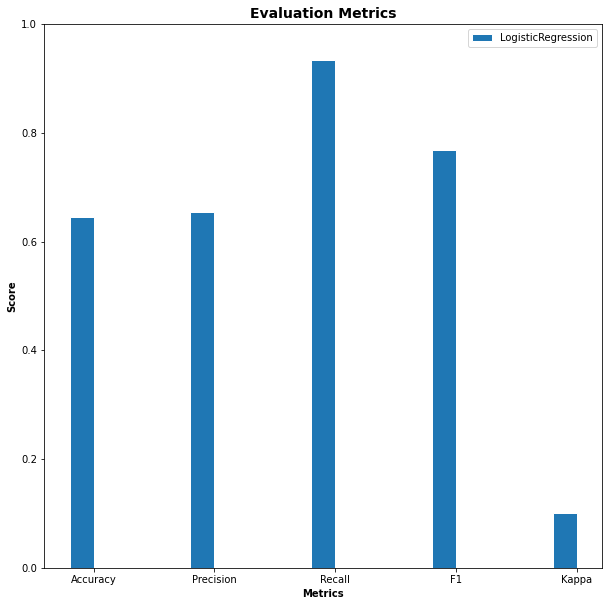

In [128]:
# Intitialize figure with two plots

fig, ax = plt.subplots(figsize = (10,10))

fig.set_figheight(10)
fig.set_figwidth(10)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
LR_score = [LR_eval0['acc'], LR_eval0['prec'], LR_eval0['rec'], LR_eval0['f1'], LR_eval0['kappa']]
# knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]



## Set position of bar on X axis
r1 = np.arange(len(LR_score))
r2 = [x + barWidth for x in r1]



## Make the plot
# ax.bar(r1, clf_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax.bar(r2, LR_score, width=barWidth, edgecolor='white', label='LogisticRegression')

## Configure x and y axis
ax.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax.set_xticks([r + (barWidth * 1.5) for r in range(len(LR_score))], )
ax.set_xticklabels(labels)
ax.set_ylabel('Score', fontweight='bold')
ax.set_ylim(0, 1)

## Create legend & title
ax.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax.legend()


plt.show()
fig.savefig('Evaluation Metrics.png',dpi=600,bbox_inches='tight')